<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/main/7506R_TP1_GRUPO21_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [1]:
import pandas as pd
import random
import numpy as np
from google.colab import drive
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns

#modelos y métricas
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, make_scorer#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

#Modelado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.ensemble import VotingClassifier
from collections import defaultdict

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive', force_remount=True)
df_trabajo = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train_filtered.csv")
df_test = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_test.csv")

df_trabajo

Mounted at /content/drive


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,agent_cancela_seguido,habitacion_correcta,estadia
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,False,True,Reserva con\nambos casos
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,False,True,Reservas entre\nsemana
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,False,True,Reservas entre\nsemana
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,True,True,Reserva con\nambos casos
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,True,True,Reserva con\nambos casos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,False,False,Reservas entre\nsemana
60628,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,False,True,Reservas entre\nsemana
60629,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,False,True,Reserva con\nambos casos
60630,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,False,True,Reserva con\nambos casos


In [ ]:
df_trabajo_x = df_trabajo.drop(['is_canceled','id'], axis='columns')
df_trabajo_y = df_trabajo['is_canceled'].copy()

In [ ]:
df_trabajo_x = pd.get_dummies(df_trabajo_x, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)
#df_trabajo_x_OHE = pd.get_dummies(df_trabajo_x_OHE, columns=['country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

# Hay un par de variables que no consideramos que sea mejor con OHE como los mese que ya tienen un orden o meal que solo creemos que va agregar ruido
le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in df_trabajo_x.columns:
    if df_trabajo_x[column].dtype == 'object':
        df_trabajo_x[column] = le.fit_transform(df_trabajo_x[column])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x, 
                                                    df_trabajo_y, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=df_trabajo_y) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48505
# Datos Prueba: 12127
% Positivos Entrenamiento: 50.215
% Positivos Prueba: 50.219


In [ ]:
#Armo una version escalada con minmax (media=0 , var=1  )
scaler=preprocessing.StandardScaler()
x_train_transform = scaler.fit_transform(x_train) 
x_test_transform  = scaler.transform(x_test) 

# Redes Neuronales

## Red Generica

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 64        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.01), 
  loss='binary_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['AUC'], 
)

cant_epochs=100
modelo_reserva = modelo.fit(x_train_transform,y_train,epochs=cant_epochs,batch_size=50,verbose=False)

379/379 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      6037
           1       0.77      0.87      0.82      6090

    accuracy                           0.80     12127
   macro avg       0.81      0.80      0.80     12127
weighted avg       0.81      0.80      0.80     12127



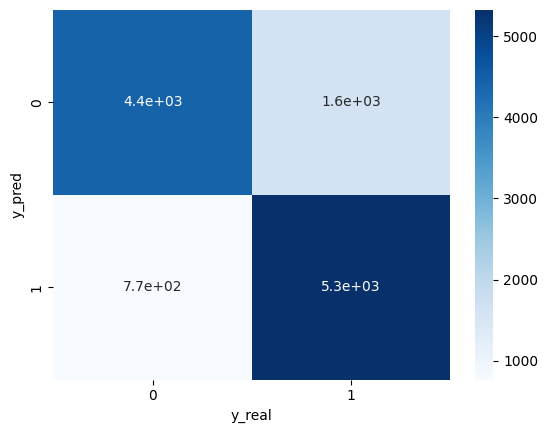

In [ ]:
y_predic_ej1 = modelo.predict(x_test_transform)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
metricas(y_predic_cat_ej1,y_test)
plt.show()

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_generica.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/red_neuronal_generica.joblib']

## Red Mejorada

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

<ipython-input-26-3660c14f065e>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
<ipython-input-26-3660c14f065e>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()


In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))

d_in=len(x_train.columns)
modelo_2 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])

modelo_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 128       
                                                                 
 dense_18 (Dense)            (None, 2)                 6         
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_2.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['AUC'], 
)

cant_epochs=100

historia_modelo=modelo_2.fit(x_train_transform,y_train_encoder,epochs=cant_epochs,batch_size=16,verbose=False)

In [ ]:
y_pred = modelo_2.predict(x_test_transform)

379/379 [==============================] - 1s 2ms/step


In [ ]:
y_pred_classes=np.argmax(y_pred,axis=1).tolist()
y_real_classes=np.argmax(y_test_encoder,axis=1).tolist()

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      6037
           1       0.76      0.90      0.82      6090

   micro avg       0.77      0.89      0.83     12127
   macro avg       0.77      0.89      0.83     12127
weighted avg       0.77      0.89      0.83     12127
 samples avg       0.81      0.89      0.84     12127



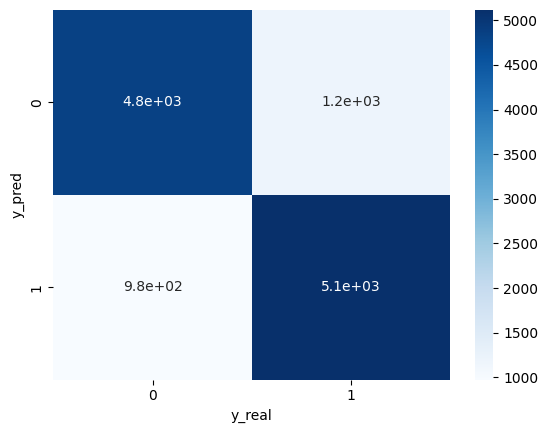

In [ ]:
ds_validacion_iris=pd.DataFrame(y_pred_classes,y_real_classes).reset_index()
ds_validacion_iris.columns=['y_pred','y_real']

y_pred_cat = np.where(y_pred>0.4,1,0)

tabla_iris=pd.crosstab(ds_validacion_iris.y_pred, ds_validacion_iris.y_real)
grf=sns.heatmap(tabla_iris,annot=True, cmap = 'Blues')
metricas(y_pred_cat,y_test_encoder)
plt.show()

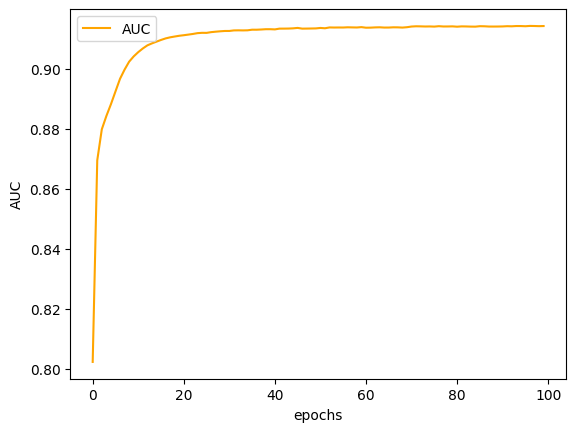

In [ ]:
epochs = range(cant_epochs)

plt.plot(epochs, historia_modelo.history['auc'], color='orange', label='AUC')
plt.xlabel("epochs")
plt.ylabel("AUC")
plt.legend()

## Otra Red

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Create the sklearn model for the network

def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(2,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])
    
    modelo.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01), 
      loss='categorical_crossentropy', 
      # metricas para ir calculando en cada iteracion o batch 
      metrics=['AUC'], 
    )
    
    return modelo

In [ ]:
modelo_cv = KerasClassifier(build_fn=create_model)

<ipython-input-43-916b8eeeda14>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_cv = KerasClassifier(build_fn=create_model)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'epochs': [50, 100, 150],
    'batch_size' : [5, 10, 20]
}

print(param_grid)

grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
grid_result = grid.fit(x_train_transform, y_train_encoder)

{'epochs': [50, 100, 150], 'batch_size': [5, 10, 20]}
Epoch 1/50
7761/7761 [==============================] - 18s 2ms/step - loss: 0.4413 - auc: 0.8772
Epoch 2/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3939 - auc: 0.9004
Epoch 3/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3848 - auc: 0.9037
Epoch 4/50
7761/7761 [==============================] - 16s 2ms/step - loss: 0.3810 - auc: 0.9055
Epoch 5/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3790 - auc: 0.9057
Epoch 6/50
7761/7761 [==============================] - 15s 2ms/step - loss: 0.3773 - auc: 0.9063
Epoch 7/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3761 - auc: 0.9070
Epoch 8/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3761 - auc: 0.9066
Epoch 9/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3753 - auc: 0.9069
Epoch 10/50
7761/7761 [==============================] - 14s 2ms

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


7761/7761 [==============================] - 15s 2ms/step - loss: 0.4314 - auc: 0.8826
Epoch 2/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3856 - auc: 0.9039
Epoch 3/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3802 - auc: 0.9050
Epoch 4/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3765 - auc: 0.9070
Epoch 5/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3757 - auc: 0.9070
Epoch 6/50
7761/7761 [==============================] - 13s 2ms/step - loss: 0.3737 - auc: 0.9078
Epoch 7/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3734 - auc: 0.9077
Epoch 8/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3718 - auc: 0.9087
Epoch 9/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3715 - auc: 0.9086
Epoch 10/50
7761/7761 [==============================] - 14s 2ms/step - loss: 0.3710 - auc: 0.9087
Epoch 11/50
7761/7761 [=======

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
y_predic_iris_cv =grid.predict(x_test_transform)

In [ ]:
ds_validacion_iris=pd.DataFrame(y_predic_iris_cv,y_test).reset_index()
ds_validacion_iris.columns=['y_pred','y_real']

tabla_iris=pd.crosstab(ds_validacion_iris.y_pred, ds_validacion_iris.y_real)
grf=sns.heatmap(tabla_iris,annot=True, cmap = 'Blues')
metricas()
plt.show()

# Submit


In [ ]:
#AGent
pivot_table = pd.pivot_table(df_trabajo, index="agent", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table["Porcentaje de Cancelados"] = np.rint(pivot_table["Cancelado"]/pivot_table["Total"]*100)

agents = pivot_table[(pivot_table["Porcentaje de Cancelados"] > 65) & (pivot_table["Total"] > 100)].index.to_list()

df_test["agent_cancela_seguido"] = df_test["agent"].isin(agents)

#Habitacion correcta
df_test['habitacion_correcta'] = (df_test['reserved_room_type'] == df_test['assigned_room_type'])

#Estadia
stay_mapping = {
    0: "Reservas sin\nnoches",
    1: "Reservas entre\nsemana",
    2: "Reservas en fin\nde semana",
    3: "Reserva con\nambos casos"
}

df_test['estadia'] = (
    df_test['stays_in_weekend_nights'].apply(lambda x: 2 if x > 0 else 0) + 
    df_test['stays_in_week_nights'].apply(lambda x: 1 if x > 0 else 0)
)


df_test['estadia'] = df_test['estadia'].map(stay_mapping)

df_test['country'].fillna("Otros")

df_test.loc[df_test["assigned_room_type"].isin(["B", "C", "H","I","K","P","L"]), "assigned_room_type"] = "Otros"
df_test.loc[df_test["reserved_room_type"].isin(["B", "C", "H","I","K","P","L"]), "reserved_room_type"] = "Otros"

lista_paises = df_trabajo["country"].value_counts().index.to_list()
lista_paises.remove("Otros")

df_test.loc[~df_test["country"].isin(lista_paises), "country"] = "Otros"

In [ ]:
X_submission = pd.get_dummies(df_test, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

from sklearn.preprocessing import (
    LabelEncoder
)

le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in X_submission.columns:
    if X_submission[column].dtype == 'object':
        X_submission[column] = le.fit_transform(X_submission[column])

In [ ]:
X_submission.drop(['id','company','reservation_status_date'], axis='columns',inplace=True)
X_submission.fillna(0, inplace=True)

X_submission_scaler = scaler.transform(X_submission) 

In [ ]:
y_pred_1 = modelo.predict(X_submission_scaler)
y_pred_modelo = np.where(y_pred_1 >0.4, 1,0)
y_pred = y_pred_modelo.flatten()

830/830 [==============================] - 2s 2ms/step


In [ ]:
df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})
df_submission.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
df_submission.to_csv('/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Submission/chp4_redes.csv', index=False)